In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [2]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("../Cali_Files/bitonic-random-p4-a4.cali"))

(1/2) Reading Files: 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]
0it [00:00, ?it/s]


View Calltree

In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.430 main
├─ 0.000 MPI_Init
├─ 0.865 main
│  ├─ 0.002 data_init_runtime
│  ├─ 0.769 MPI_Barrier
│  ├─ 0.000 comp
│  │  ├─ 0.000 comp_sort_local
│  │  └─ 0.000 comp_sort_combined
│  ├─ 0.065 comm
│  │  ├─ 0.025 comm_small
│  │  │  └─ 0.025 MPI_Sendrecv
│  │  └─ 0.039 MPI_Barrier
│  └─ 0.019 correctness_check
│     ├─ 0.010 MPI_Recv
│     ├─ 0.000 MPI_Send
│     ├─ 0.010 MPI_Reduce
│     └─ 0.001 MPI_Bcast
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Initialized
├─ 0.000 MPI_Finalized
└─ 0.044 MPI_Comm_dup

Legend (Metric: Avg time/rank Min: 0.00 Max: 1.43 indices: {'profile': 3838912302})
█ 1.29 - 1.43
█ 1.00 - 1.29
█ 0.71 - 1.00
█ 0.43 - 0.71
█ 0.14 - 0.43
█ 0.00 - 0.14

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `matrix_size` in the Thicket metadata table.

In [35]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("matrix_size")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "matrix_size"]).sort_index()

tk.dataframe

profile  \
node                                               num_procs matrix_size               
{'name': 'main', 'type': 'function'}               2         1024         4063601372   
                                                   4         1024         2728634777   
                                                   8         1024          812587253   
                                                   16        1024         1713684827   
                                                   32        1024         2068039858   
                                                   64        1024         1509308911   
{'name': 'whole_computation', 'type': 'function'}  2         1024         4063601372   
                                                   4         1024         2728634777   
                                                   8         1024          812587253   
                                                   16        1024         1713684827   
                                                   32        1024         2068039858   
                                                   64        1024         1509308911   
{'name': 'master_initialization', 'type': 'func... 2         1024         4063601372   
                                                   4         1024         2728634777   
                                                   8         1024          812587253   
                                                   16        1024         1713684827   
                                                   32        1024         2068039858   
                                                   64        1024         1509308911   
{'name': 'master_send_recieve', 'type': 'functi... 2         1024         4063601372   
                                                   4         1024         2728634777   
                                                   8         1024          812587253   
                                                   16        1024         1713684827   
                                                   32        1024         2068039858   
                                                   64        1024         1509308911   
{'name': 'worker_calculation', 'type': 'function'} 2         1024         4063601372   
                                                   4         1024         2728634777   
                                                   8         1024          812587253   
                                                   16        1024         1713684827   
                                                   32        1024         2068039858   
                                                   64        1024         1509308911   
{'name': 'worker_recieve', 'type': 'function'}     2         1024         4063601372   
                                                   4         1024         2728634777   
                                                   8         1024          812587253   
                                                   16        1024         1713684827   
                                                   32        1024         2068039858   
                                                   64        1024         1509308911   
{'name': 'worker_send', 'type': 'function'}        2         1024         4063601372   
                                                   4         1024         2728634777   
                                                   8         1024          812587253   
                                                   16        1024         1713684827   
                                                   32        1024         2068039858   
                                                   64        1024         1509308911   

                                                                          nid  \
node                                               num_procs matrix_size        
{'name': 'main', 'type': 'function'}      

In [36]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64]
matrix_sizes = [128, 1024, 8192]

In [37]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [38]:
def plot_pandas(df, title, xlabel, ylabel):
    styles = ['-', '--', ':']
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7),
        style=styles
    )
    
    return plot

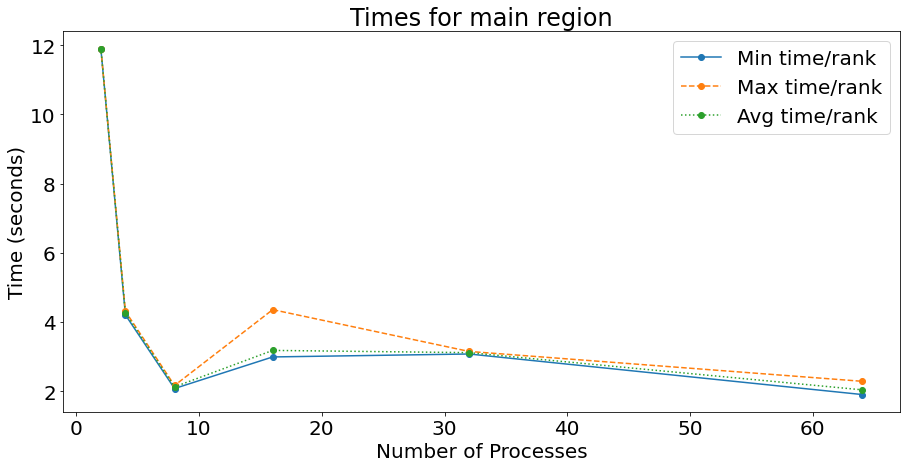

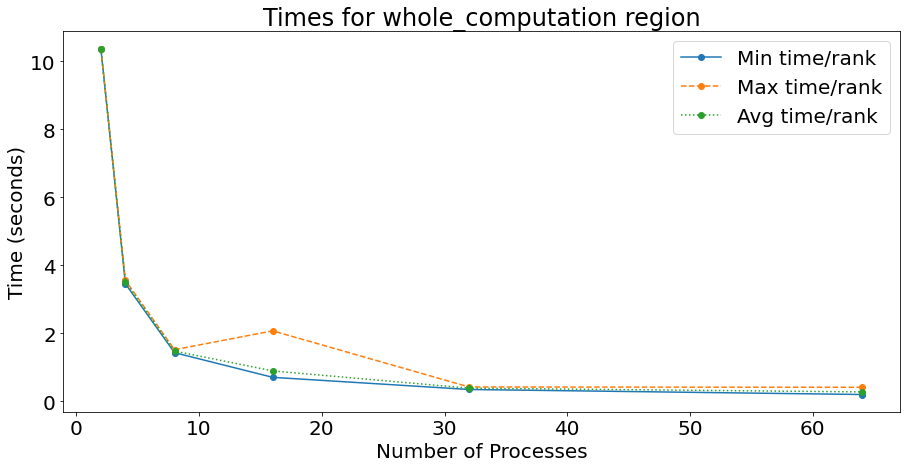

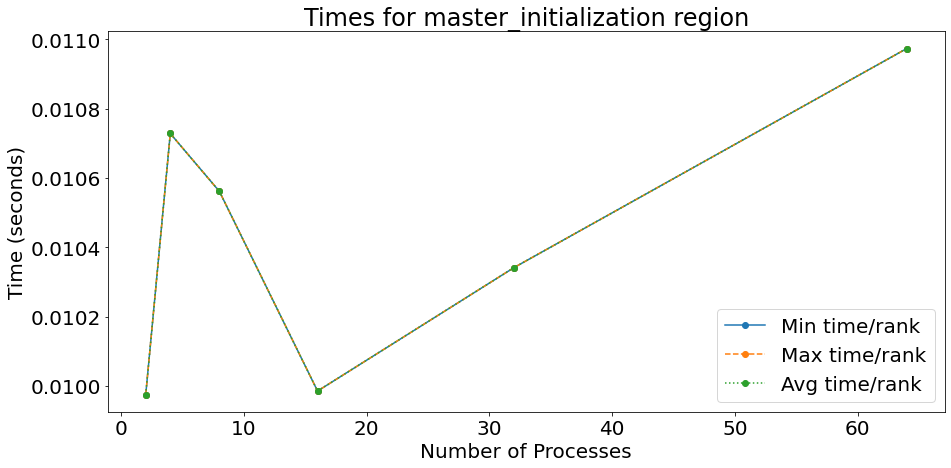

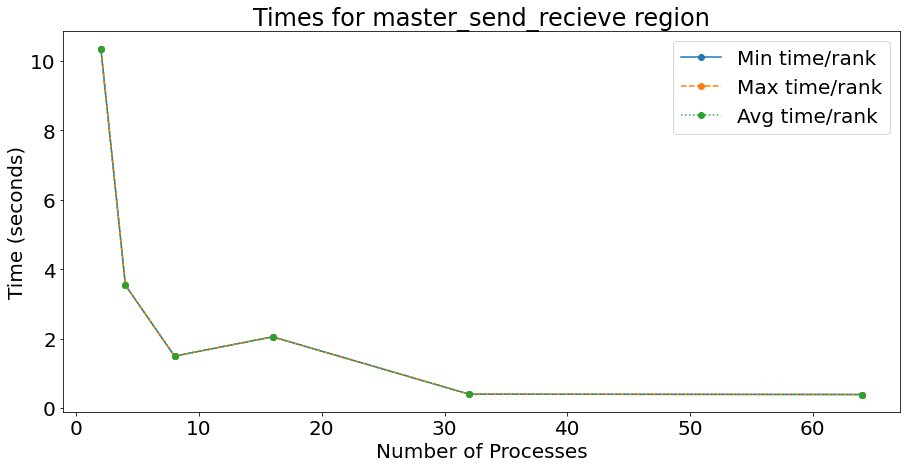

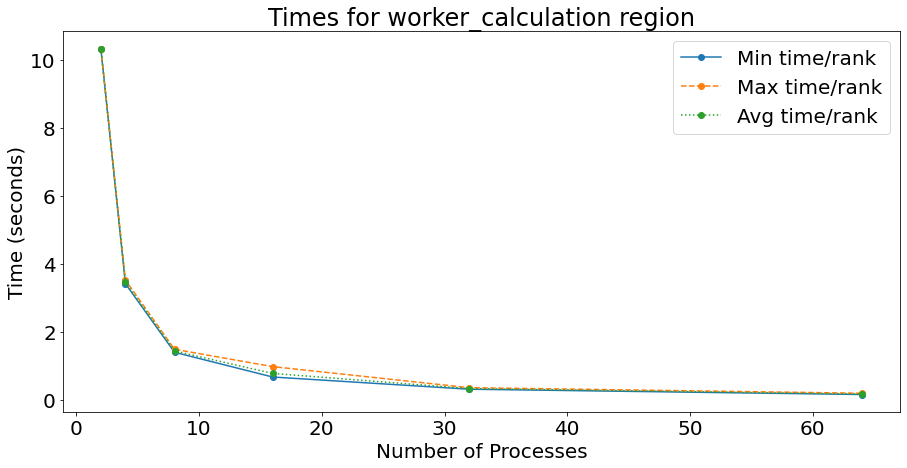

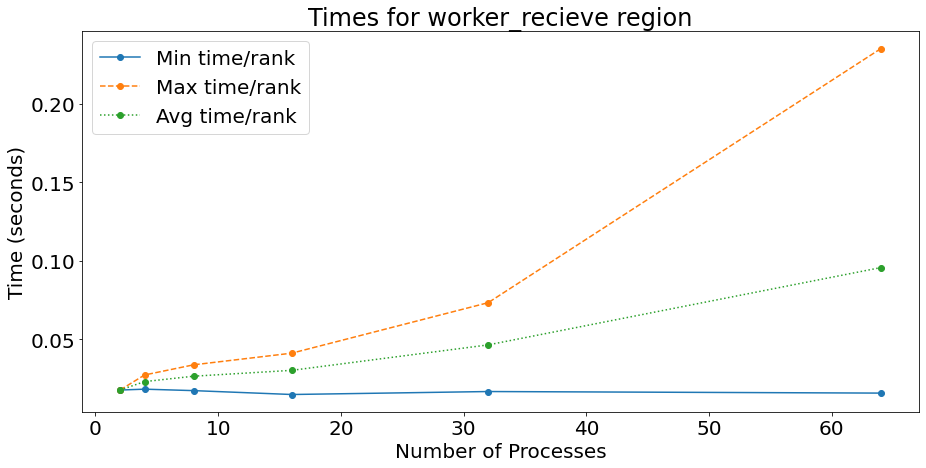

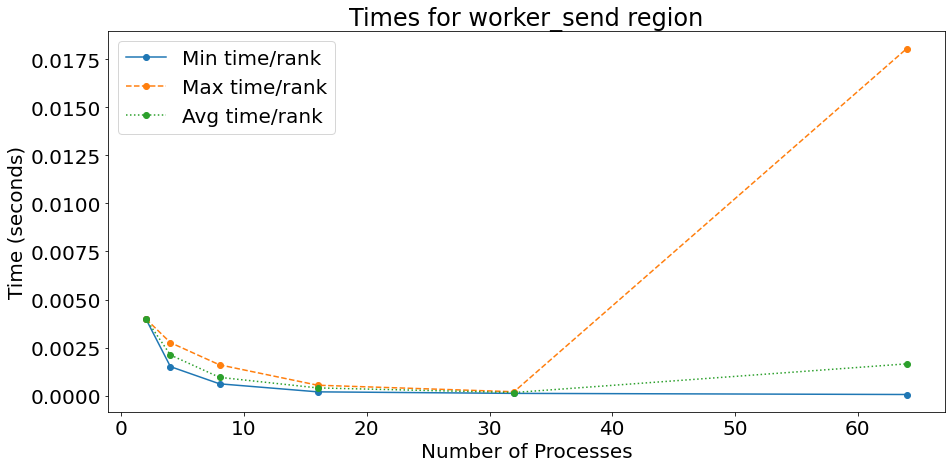

In [39]:
for node in tk.graph.traverse():
    df=tk.dataframe.loc[node, ["Min time/rank", "Max time/rank", "Avg time/rank"]].unstack(level="matrix_size")
    df.columns = [col[0] for col in df.columns]
    plot_pandas(
        df,
        title="Times for {0} region".format(node.frame["name"]),
        xlabel="Number of Processes",
        ylabel="Time (seconds)",
    )

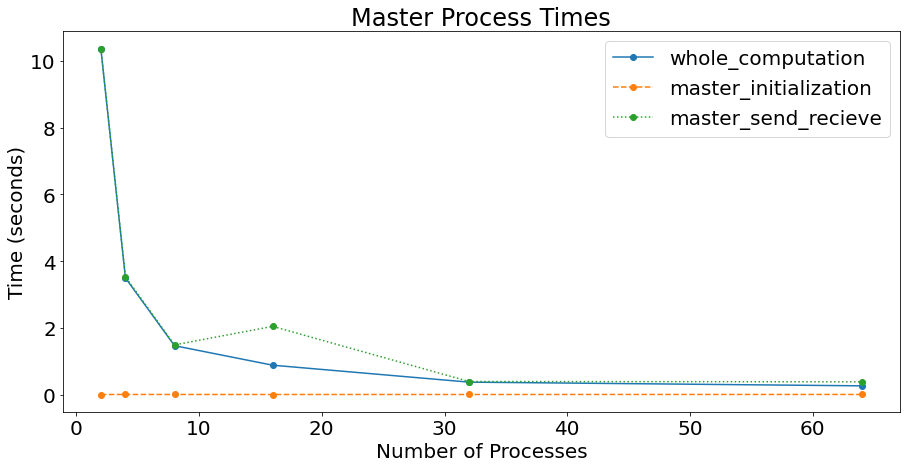

<Axes: title={'center': 'Master Process Times'}, xlabel='Number of Processes', ylabel='Time (seconds)'>

In [40]:
def plot_combined_avg_times(nodes, df, title, xlabel, ylabel):
    combined_df = pd.DataFrame()
    styles = ['-', '--', ':']
    for node in nodes:
        node_name = node.frame["name"]
        avg_time_df = df.loc[node, "Avg time/rank"].unstack(level="matrix_size")
        avg_time_df.columns = [node_name]
        combined_df = pd.concat([combined_df, avg_time_df], axis=1)

    ax = combined_df.plot(
        kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15, 7),
        style=styles
    )
    
    plt.show()
    return ax

selected_nodes = ["whole_computation", "master_initialization", "master_send_recieve"]

relevant_nodes = [node for node in tk.graph.traverse() if node.frame["name"] in selected_nodes]

plot_combined_avg_times(
    nodes=relevant_nodes,
    df=tk.dataframe,
    title="Master Process Times",
    xlabel="Number of Processes",
    ylabel="Time (seconds)"
)
